In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math 
import tensorflow

In [2]:
df=pd.DataFrame(np.sin(np.linspace(0,50,501)),columns=['sine'])
df

,sine
0,0.000000
1,0.099833
2,0.198669
3,0.295520
4,0.389418
...,...
496,-0.617439
497,-0.535823
498,-0.448854
499,-0.357400


<AxesSubplot:>

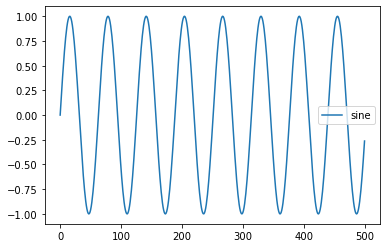

In [3]:
df.plot()

In [4]:
length=round(len(df)*0.1)

In [5]:
X_train=df[:-length]

In [6]:
X_test=df[-length:]

In [7]:
import sklearn

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler()


In [10]:
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [11]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [12]:
length=49
batch_size=1

generator= TimeseriesGenerator(x_train_scaled,x_train_scaled,length=length,batch_size=batch_size)

In [13]:
len(generator)

402

In [14]:
x, y = generator[0]

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping       

In [16]:
early_stopping=EarlyStopping(monitor='loss', patience=1)

In [17]:
n_features = 1

In [18]:
model=Sequential()
model.add(SimpleRNN(50,input_shape=(length,n_features),activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


C:\Users\asus\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


402/402 [==============================] - 33s 80ms/step - loss: 0.0048
Epoch 2/5
402/402 [==============================] - 38s 93ms/step - loss: 1.4152e-04
Epoch 3/5
402/402 [==============================] - 42s 105ms/step - loss: 1.8882e-04
Epoch 4/5
402/402 [==============================] - 43s 107ms/step - loss: 5.1281e-05
Epoch 5/5
402/402 [==============================] - 45s 112ms/step - loss: 2.6000e-05


<AxesSubplot:>

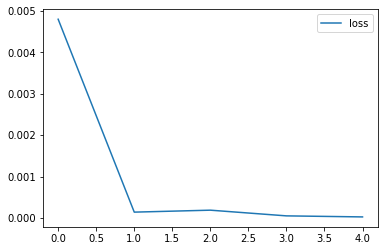

In [21]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [22]:
first_eval_batch = x_train_scaled[-length:]

In [23]:
current_batch=first_eval_batch.reshape(1,length,n_features)

In [24]:
model.predict(current_batch)

array([[0.94993573]], dtype=float32)

In [25]:
# current_batch

In [26]:
# current_batch[:,1:,:]

In [27]:
new_value=model.predict(current_batch)

In [35]:
# np.append(current_batch[:,1:,:],new_value).reshape(1,length,n_features)

In [36]:
predicted_values=[]
first_eval_batch = x_train_scaled[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(length+1):
    prediction=model.predict(current_batch)[0]
    predicted_values.append(prediction)
    current_batch=np.append(current_batch[:,1:,:],prediction).reshape(1,length,n_features)
    
    

In [37]:
predicted_values.append

<function list.append(object, /)>

In [38]:
len(predicted_values)

50

In [39]:
predicted_values

[array([0.94993573], dtype=float32),
 array([0.96974003], dtype=float32),
 array([0.984836], dtype=float32),
 array([0.9950868], dtype=float32),
 array([1.0003724], dtype=float32),
 array([1.0006158], dtype=float32),
 array([0.9958092], dtype=float32),
 array([0.98601025], dtype=float32),
 array([0.9713116], dtype=float32),
 array([0.95185065], dtype=float32),
 array([0.92783815], dtype=float32),
 array([0.89952236], dtype=float32),
 array([0.8671974], dtype=float32),
 array([0.8312011], dtype=float32),
 array([0.7919114], dtype=float32),
 array([0.7497434], dtype=float32),
 array([0.7051414], dtype=float32),
 array([0.6585803], dtype=float32),
 array([0.61055124], dtype=float32),
 array([0.5615655], dtype=float32),
 array([0.5121467], dtype=float32),
 array([0.4631256], dtype=float32),
 array([0.4150897], dtype=float32),
 array([0.36706755], dtype=float32),
 array([0.32015514], dtype=float32),
 array([0.2762724], dtype=float32),
 array([0.2341954], dtype=float32),
 array([0.1949953], 

In [40]:
true_predictions = scaler.inverse_transform(predicted_values)

In [41]:
X_test['Predictions'] = true_predictions

C:\Users\asus\AppData\Local\Temp/ipykernel_6428/290687461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Predictions'] = true_predictions


<AxesSubplot:>

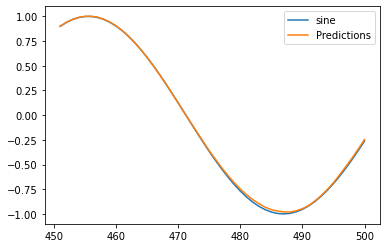

In [42]:
X_test.plot()

In [52]:
early_stopping=EarlyStopping(monitor='val_loss', patience=2)

In [53]:
length=49
generator=TimeseriesGenerator(x_train_scaled,x_train_scaled,length=length,batch_size=1)
validation_generator=TimeseriesGenerator(x_test_scaled,x_test_scaled,length=length,batch_size=batch_size)

In [54]:
from tensorflow.keras.layers import LSTM

In [55]:
model=Sequential()

model.add(LSTM(49,input_shape=(length,n_features),activation="tanh"))

model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

In [56]:
model.fit(generator,epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stopping])

Epoch 1/20
402/402 [==============================] - 3s 6ms/step - loss: 0.0275 - val_loss: 1.6194e-04
Epoch 2/20
402/402 [==============================] - 2s 5ms/step - loss: 1.1942e-04 - val_loss: 9.6436e-07
Epoch 3/20
402/402 [==============================] - 2s 5ms/step - loss: 1.0406e-04 - val_loss: 1.5421e-05
Epoch 4/20
402/402 [==============================] - 2s 5ms/step - loss: 1.7582e-04 - val_loss: 6.6681e-05


In [57]:
predicted_values=[]
first_eval_batch = x_train_scaled[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(length+1):
    prediction=model.predict(current_batch)[0]
    predicted_values.append(prediction)
    current_batch=np.append(current_batch[:,1:,:],prediction).reshape(1,length,n_features)
    
    

C:\Users\asus\AppData\Local\Temp/ipykernel_6428/665332311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['LSTM_Predictions'] = true_predictions


<AxesSubplot:>

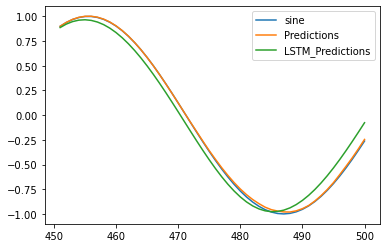

In [58]:
true_predictions = scaler.inverse_transform(predicted_values)
X_test['LSTM_Predictions'] = true_predictions
X_test.plot()

In [60]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [61]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [62]:
length

49

In [64]:
model=Sequential()

model.add(LSTM(49,input_shape=(length,n_features),activation="tanh"))

model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')
model.fit(generator,epochs=6)

Epoch 1/6
452/452 [==============================] - 4s 6ms/step - loss: 0.0176
Epoch 2/6
452/452 [==============================] - 3s 6ms/step - loss: 8.0815e-05
Epoch 3/6
452/452 [==============================] - 3s 6ms/step - loss: 1.4134e-04
Epoch 4/6
452/452 [==============================] - 2s 5ms/step - loss: 1.5466e-04
Epoch 5/6
452/452 [==============================] - 2s 5ms/step - loss: 1.1479e-04
Epoch 6/6
452/452 [==============================] - 3s 6ms/step - loss: 2.2652e-04


In [84]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(200):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [85]:
forecast = scaler.inverse_transform(forecast)

In [86]:
df

,sine
0,0.000000
1,0.099833
2,0.198669
3,0.295520
4,0.389418
...,...
496,-0.617439
497,-0.535823
498,-0.448854
499,-0.357400


In [87]:
forecast_index = np.arange(500,700,step=1)

In [88]:
forecast = forecast.reshape(len(forecast),)

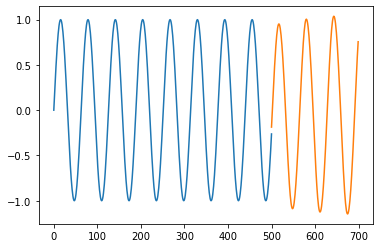

In [89]:
plt.plot(df.index,df['sine'])
plt.plot(forecast_index,forecast)